## Q-learning

![title](img/q.png)
From Sutton & Barto (1998), Reinforcement Learning.

In [1]:
import os
os.chdir("../src")
print(os.getcwd())

import copy
import numpy as np
import math
import operator
import matplotlib.pyplot as plt

from poc.run_agent import run_agent, plot_expts

%matplotlib inline
%load_ext autoreload
%autoreload 2

/scratch/cluster/clw4542/dshape/src


/scratch/cluster/clw4542/rlzoo/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/scratch/cluster/clw4542/rlzoo/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/scratch/cluster/clw4542/rlzoo/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:519: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/scratch/cluster/clw4542/rlzoo/lib/python3.6/site-packages

## Q-Learning


In [3]:
default_params = {
    # global exp settings
    "eval_freq": 5,
    "n_trials": 5,
    "n_episodes": 500,
    "max_steps_per_episode": 500,
    "time_feat": True,
    "vis_perf": True,
    "show_progress": False, 
    # gridworld settings
#     "gridworld_size": 20,
    "reward_base_value": -1,
    # algo params
    "epsilon": 0.05,
    "alpha": 0.1,
    "init_value": 0,
    "use_buffer": True,
    "buffer_size": 1000,
    "updates_per_step": 10,
    "n_sampled_goal": 3,
    "save_log": False,
    "save_policy": False
}

#### Experiment: Exploration of D-Shape vs SAC

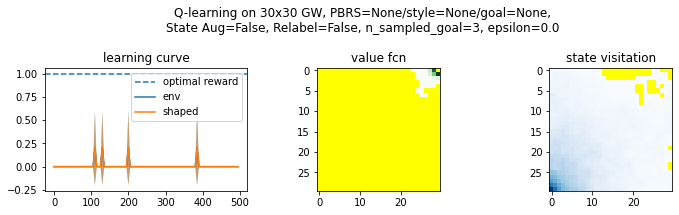

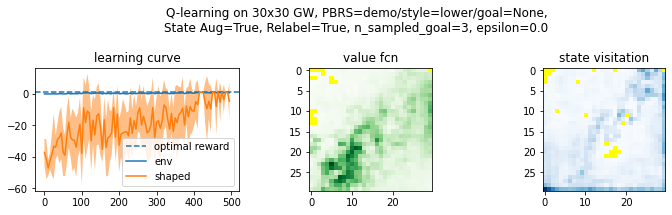

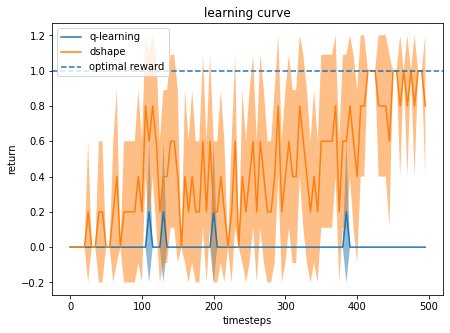

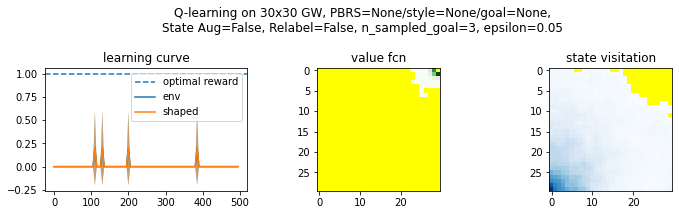

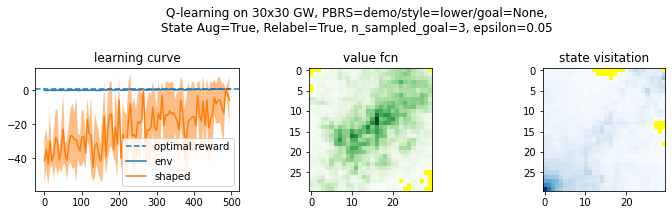

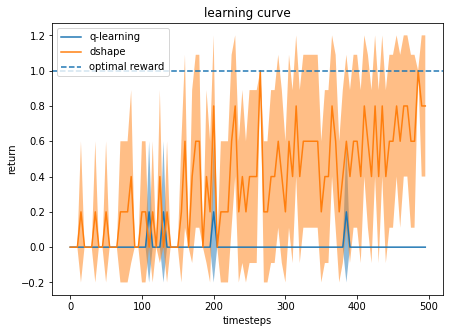

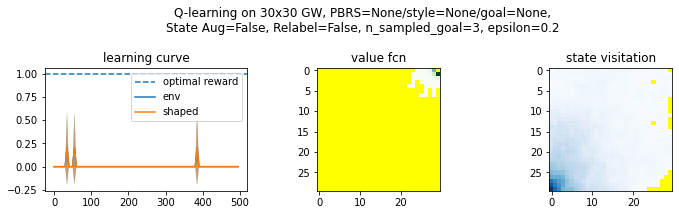

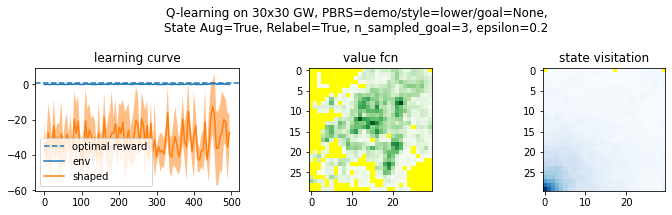

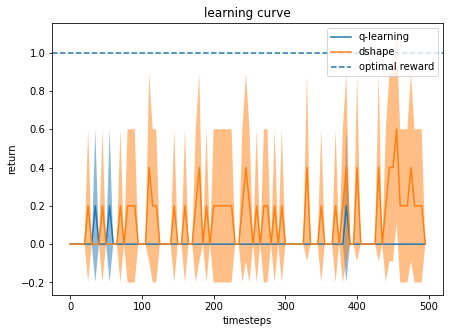

In [4]:
# 
settings = {
    "q-learning": {},
    "dshape": {
        "reward_type": "pbrs_demo",
        "demo_style": "lower",
        "state_aug": True, 
        "relabel": True 
                  },
}
gridworld_size = 30
default_params_copy = copy.deepcopy(default_params)
default_params_copy["reward_base_value"] = 0

for epsilon in [0.0, 0.05, 0.2]:
    default_params_copy["epsilon"] = epsilon
    learning_info = {}
    for exp_name, exp_params in settings.items():
        trial_rewards, opt_rew = run_agent(gridworld_size=gridworld_size, 
                                        **default_params_copy, 
                                        **exp_params)
        learning_info[exp_name] = trial_rewards

    plot_expts(learning_info, 
               eval_freq=default_params["eval_freq"], 
               opt_rew=opt_rew)

#### Experiment: Test Effect of Optimistic Initialization

In [3]:
default_params_copy = copy.deepcopy(default_params)
default_params_copy["epsilon"] = 0.0
default_params_copy["reward_base_value"] = 0

INIT VALUE IS  -1000


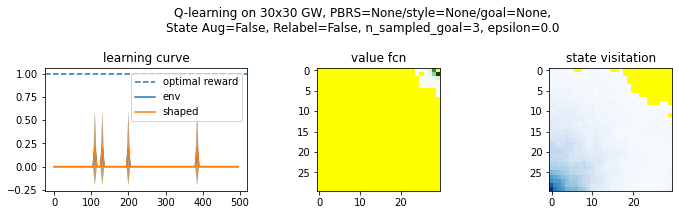

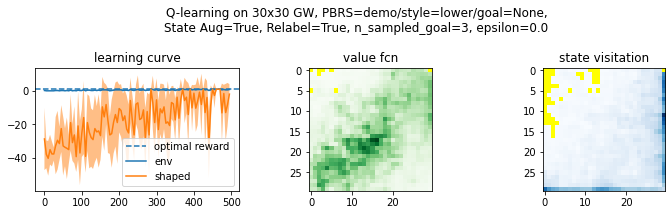

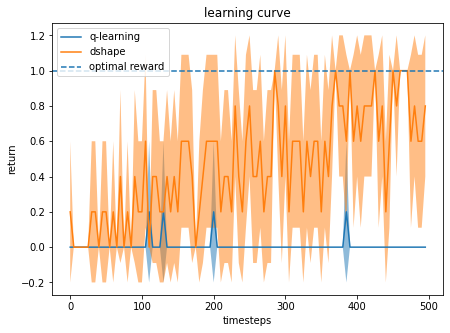

INIT VALUE IS  -500


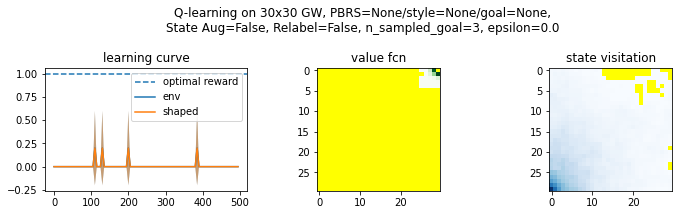

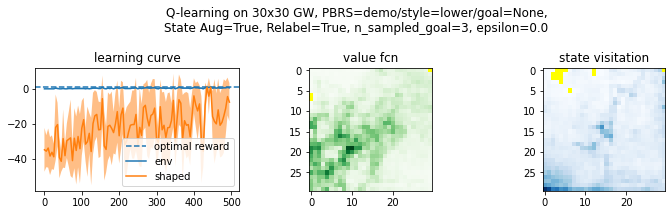

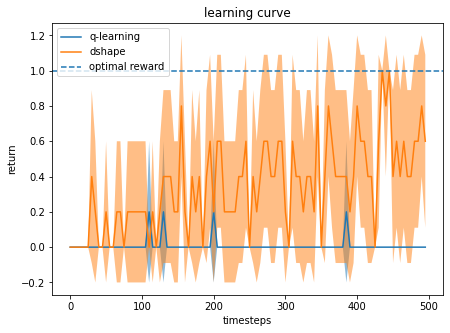

In [4]:
# test opt initialization
settings = {
    "q-learning": {},
    "dshape": {
        "reward_type": "pbrs_demo",
        "demo_style": "lower",
        "state_aug": True, 
        "relabel": True 
                  },
}
gridworld_size = 30
for init_value in [-1000, -500]:
    print("INIT VALUE IS ", init_value)
    default_params_copy["init_value"] = init_value
    learning_info = {}
    for exp_name, exp_params in settings.items():
        trial_rewards, opt_rew = run_agent(gridworld_size=gridworld_size, 
                                        **default_params_copy, 
                                        **exp_params)
        learning_info[exp_name] = trial_rewards

    plot_expts(learning_info, 
               eval_freq=default_params["eval_freq"], 
               opt_rew=opt_rew)

#### Experiment: Effect of Potential_coefficient on Conflicting Exploration Strategies

In [7]:
default_params_copy = copy.deepcopy(default_params)
# positive epsilon to create a conflicting exploration strategy
default_params_copy["epsilon"] = 0.2
default_params_copy["reward_base_value"] = 0

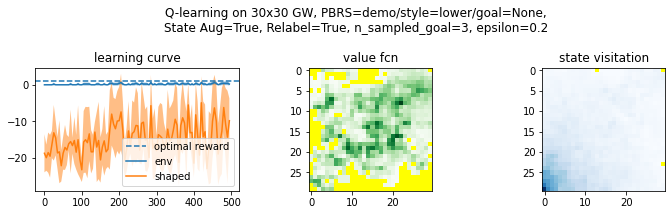

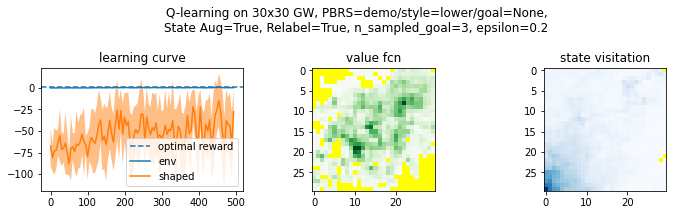

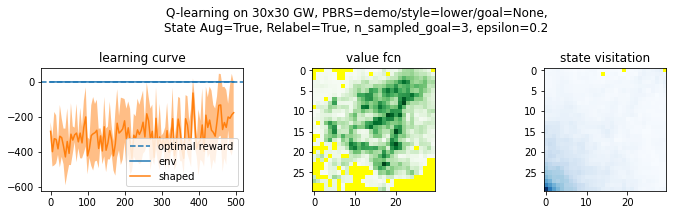

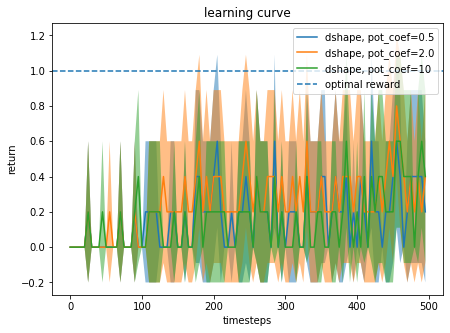

In [9]:
# test effect on potential coefficient
settings = {
    "dshape, pot_coef=0.5": {
        "reward_type": "pbrs_demo",
        "pot_coef": 0.5,
        "demo_style": "lower",
        "state_aug": True, 
        "relabel": True 
                  },
    "dshape, pot_coef=2.0": {
        "reward_type": "pbrs_demo",
        "pot_coef": 2.0,
        "demo_style": "lower",
        "state_aug": True, 
        "relabel": True 
                  },
    "dshape, pot_coef=10": {
        "reward_type": "pbrs_demo",
        "pot_coef": 10,
        "demo_style": "lower",
        "state_aug": True, 
        "relabel": True 
                  },
}
gridworld_size = 30
learning_info = {}
for exp_name, exp_params in settings.items():
    trial_rewards, opt_rew = run_agent(gridworld_size=gridworld_size, 
                                    **default_params_copy, 
                                    **exp_params)
    learning_info[exp_name] = trial_rewards

plot_expts(learning_info, 
           eval_freq=default_params["eval_freq"], 
           opt_rew=opt_rew)

#### Experiment: Ability of Reward Base Value of -1 to Induce Exploration

In this experiment, the ONLY exploratory force should come from the reward base value. 
We set epsilon=0 to ensure this.

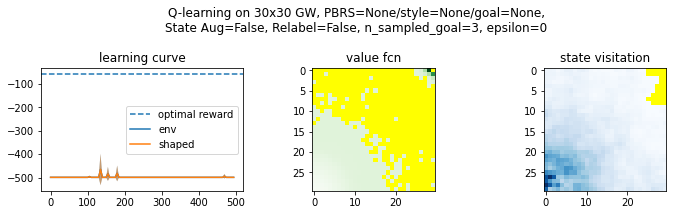

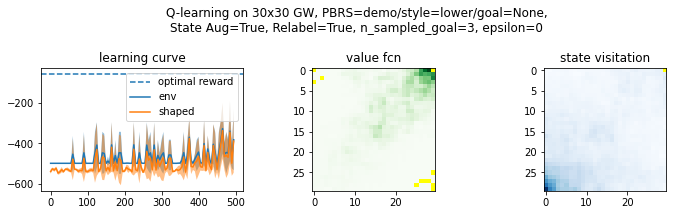

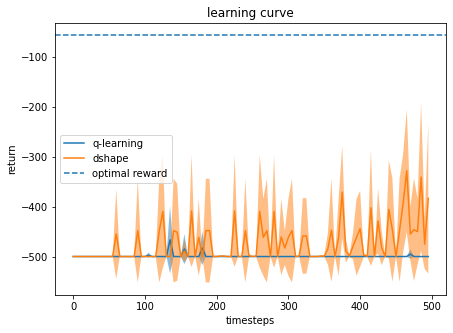

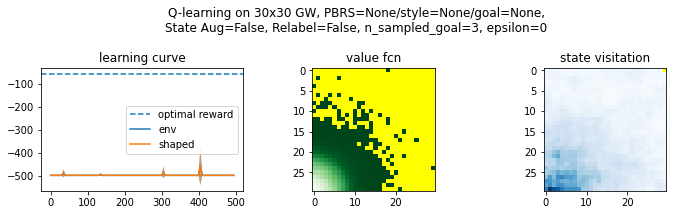

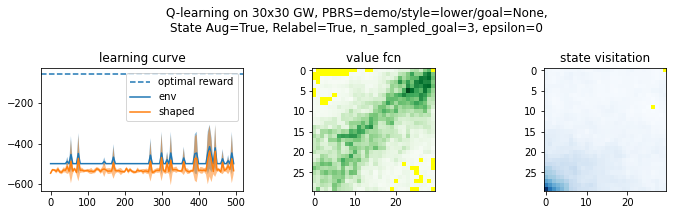

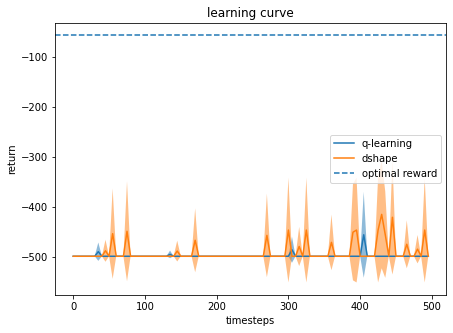

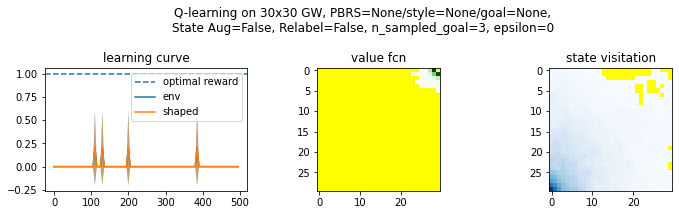

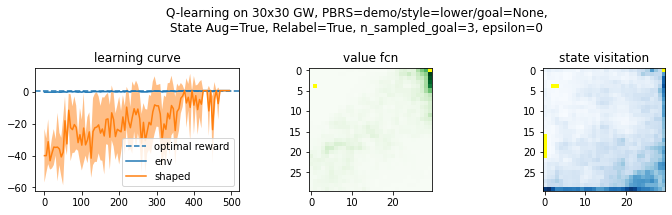

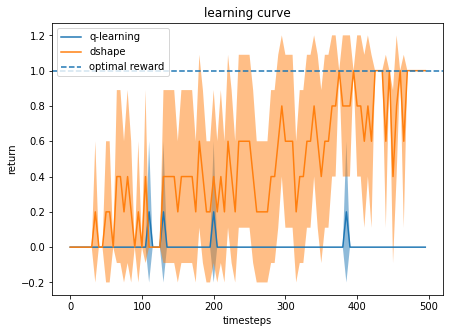

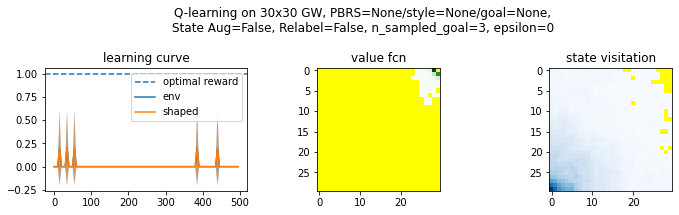

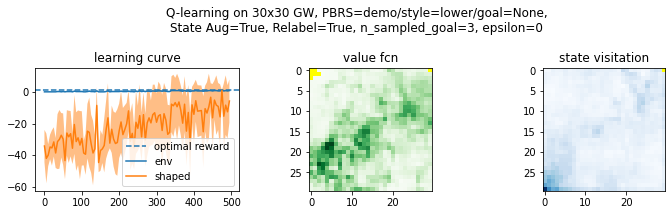

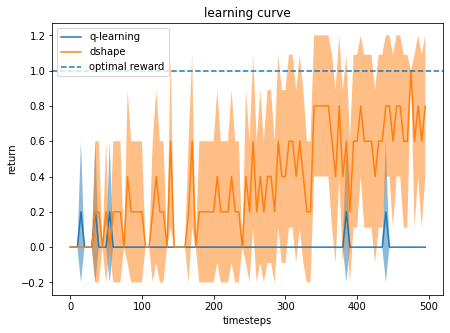

In [3]:
settings = {
    "q-learning": {},
    "dshape": {
        "reward_type": "pbrs_demo",
        "demo_style": "lower",
        "state_aug": True, 
        "relabel": True 
                  },
}
gridworld_size = 30
epsilon = 0
default_params_copy = copy.deepcopy(default_params)
default_params_copy["epsilon"] = epsilon

for reward_base_value in [-1, 0]:
    for init_value in [-500, 0]:
        default_params_copy["init_value"] = init_value
        default_params_copy["reward_base_value"] = reward_base_value
        learning_info = {}
        for exp_name, exp_params in settings.items():
            trial_rewards, opt_rew = run_agent(gridworld_size=gridworld_size, 
                                            **default_params_copy, 
                                            **exp_params)
            learning_info[exp_name] = trial_rewards

        plot_expts(learning_info, 
                   eval_freq=default_params["eval_freq"], 
                   opt_rew=opt_rew)

#### Experiment A: D-Shape vs baseline vs Ablations

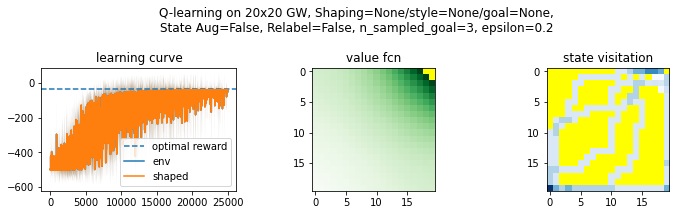

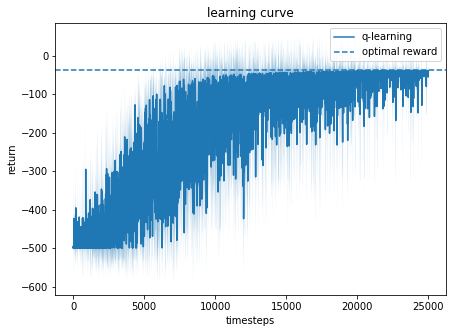

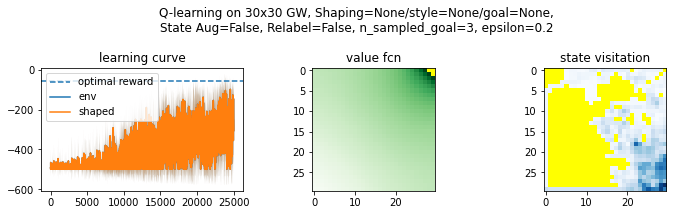

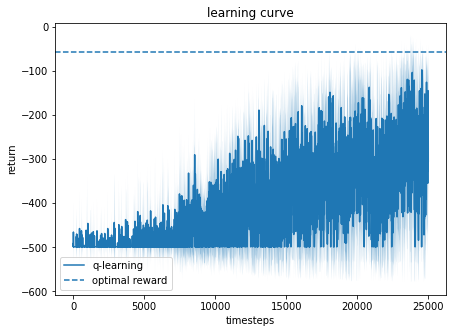

In [5]:
default_params["save_policy"] = False
default_params["save_log"] = False
default_params["n_episodes"] = 25000
default_params["max_steps_per_episode"] = 500
default_params["buffer_size"] = 5000
default_params["updates_per_step"] = 20
default_params["epsilon"] = 0.2


settings = {
    "q-learning": {},

#     "dshape": {
#         "reward_type": "pbrs_demo",
#         "demo_style": "lower",
#         "state_aug": True, 
#         "relabel": True 
#                   },
#     "pbrs_alone": {
#         "reward_type": "pbrs_demo",
#         "demo_style": "lower"
#     },
#     "pbrs+state-aug":{
#         "reward_type": "pbrs_demo", 
#         "demo_style": "lower",
#         "state_aug": True,
#     },
#     "ridm-state-aug-alone": {
#         "reward_type": None,
#         "demo_style": "lower",
#         "state_aug": True,
#     },
#     "sbs": {
#         "reward_type": "sbs",
#         "demo_style": "lower",
#         "state_aug": False
#     },
#     "manhattan": {
#         "reward_type": "manhattan",
#         "demo_style": "lower",
#         "state_aug": False,
#     }
}

for gridworld_size in [
#                       10, 
                       20,30
]:
    learning_info = {}
    for exp_name, exp_params in settings.items():
        trial_rewards, opt_rew = run_agent(gridworld_size=gridworld_size, 
                                        **default_params, 
                                        **exp_params, 
                                          savedir_name=f"{exp_name}_world=basic_size={gridworld_size}")
        learning_info[exp_name] = trial_rewards

    plot_expts(learning_info, 
               eval_freq=default_params["eval_freq"], 
               opt_rew=opt_rew)

#### Experiment B: D-Shape + Ablations on Different Demonstration Styles

Observations

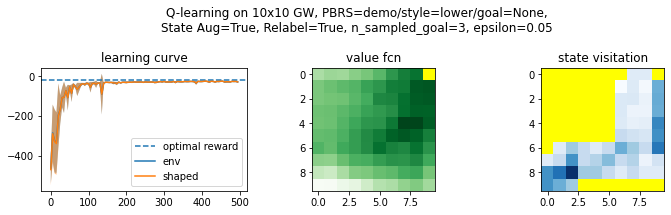

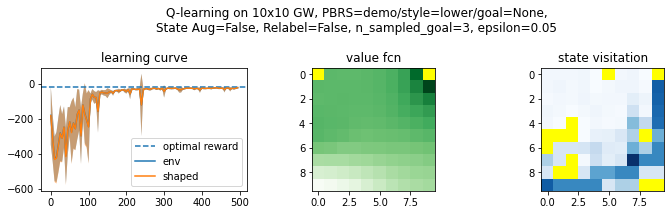

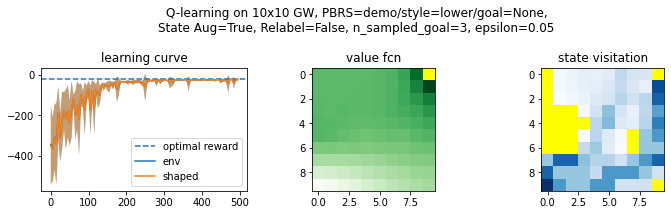

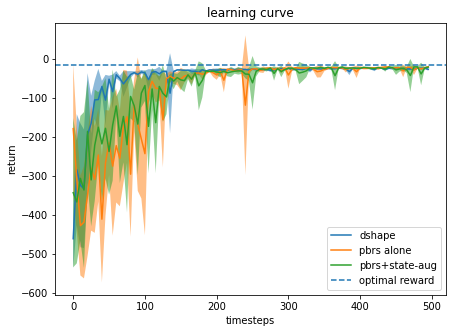

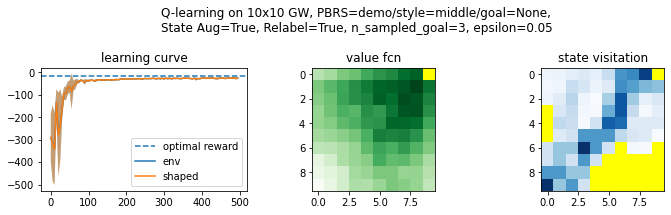

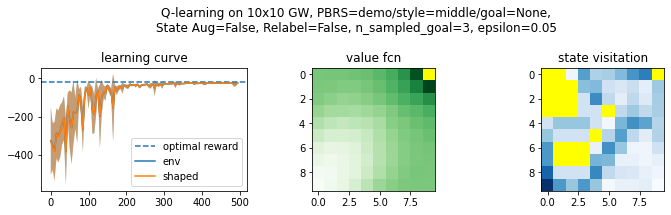

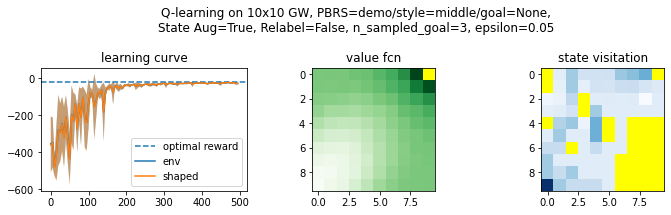

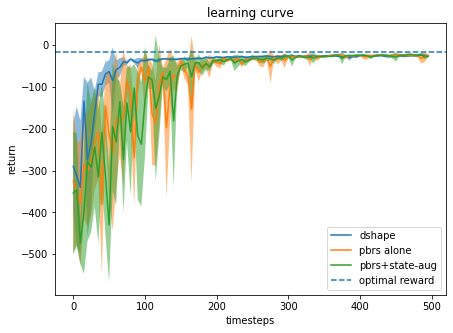

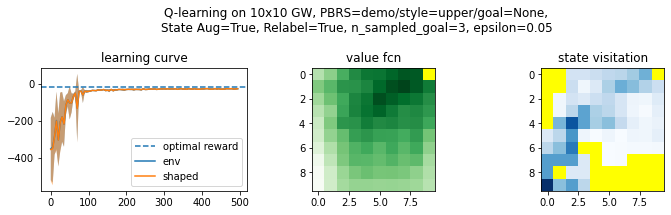

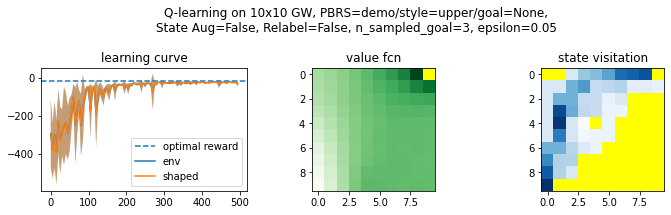

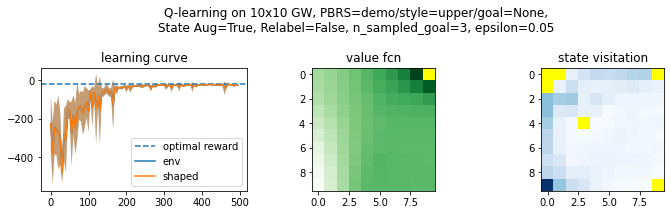

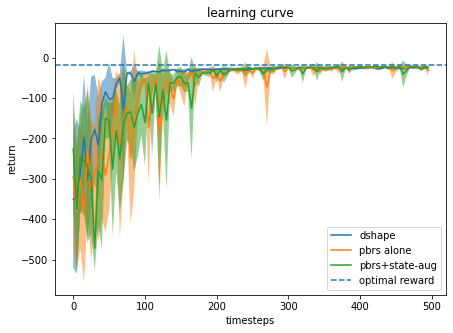

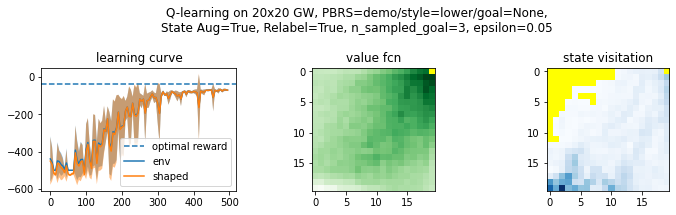

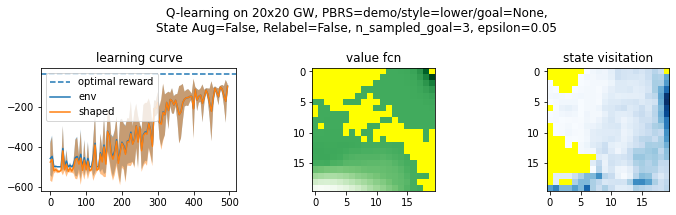

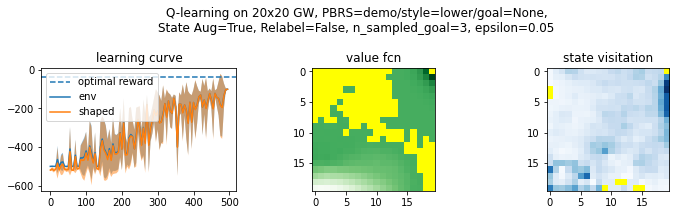

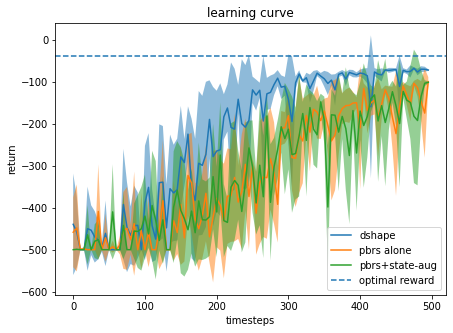

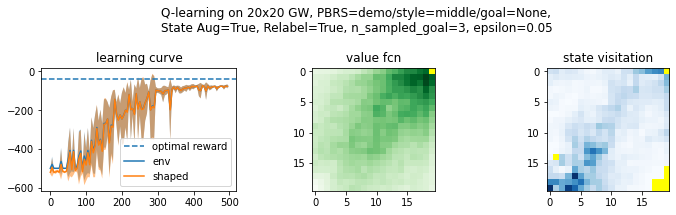

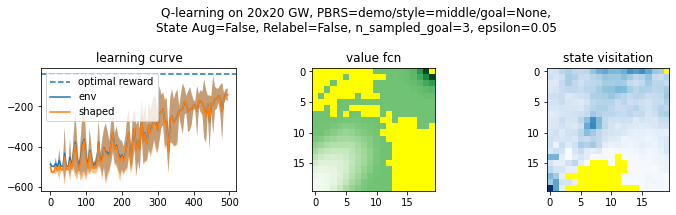

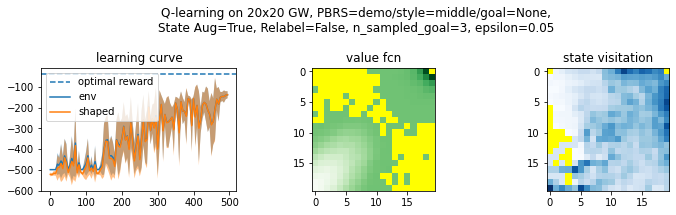

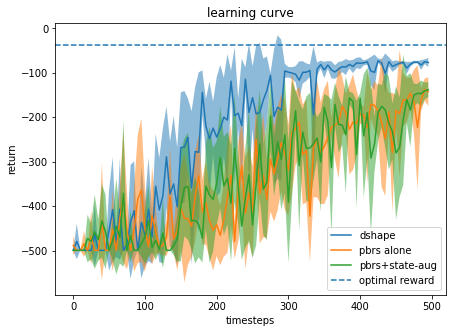

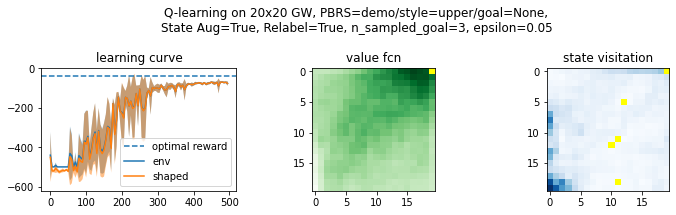

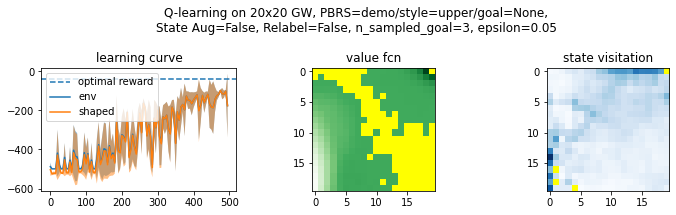

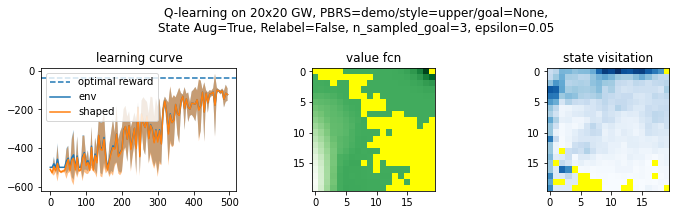

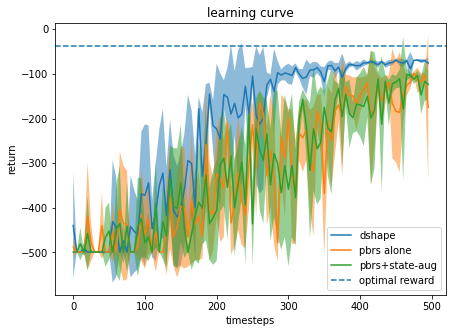

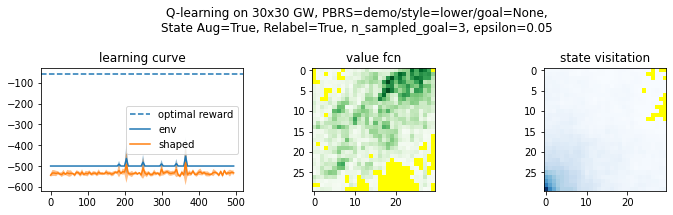

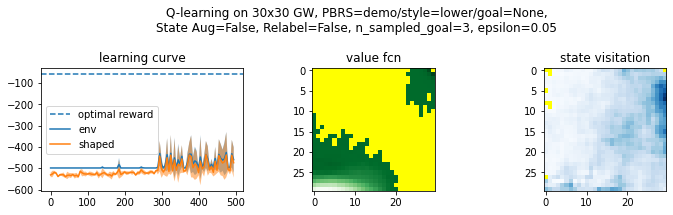

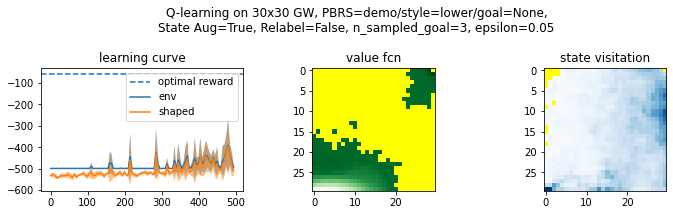

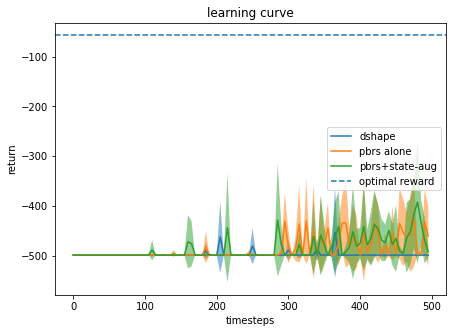

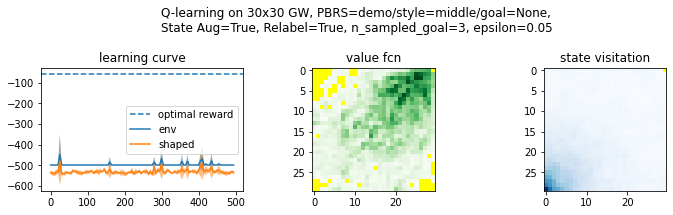

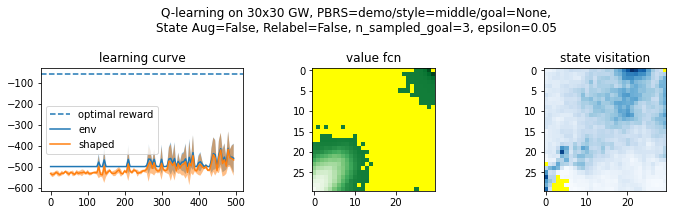

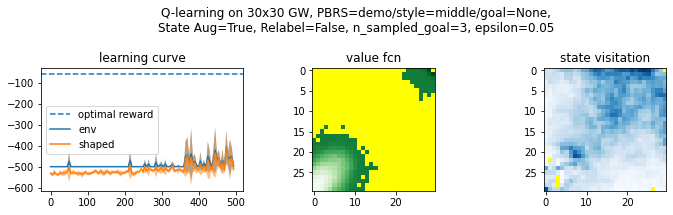

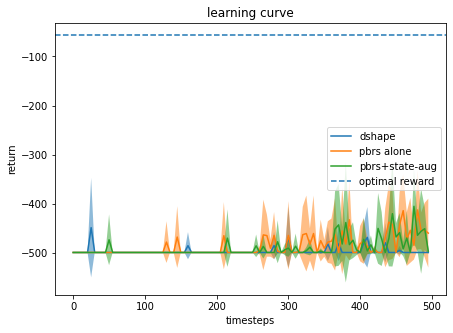

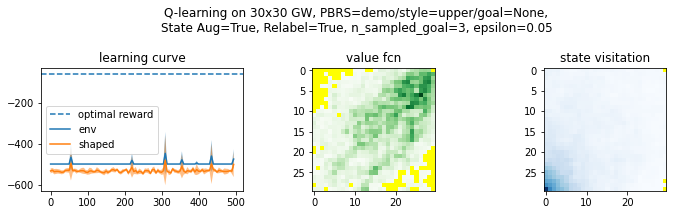

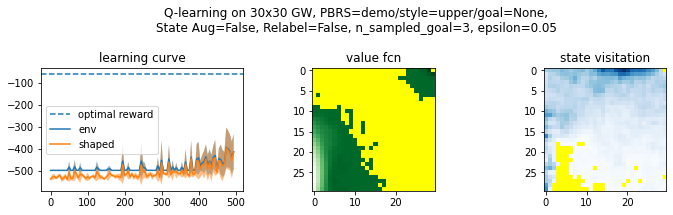

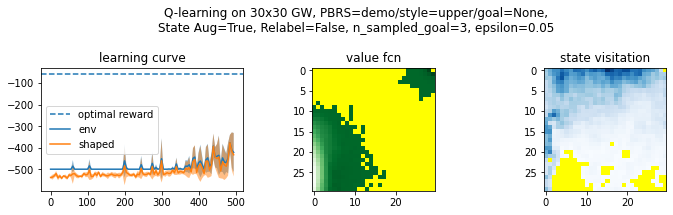

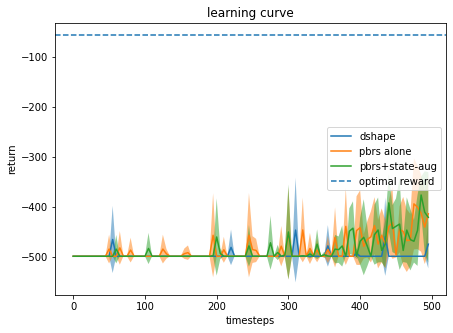

In [4]:

settings = {
    "dshape": {
        "reward_type": "pbrs_demo",
        "state_aug": True, 
        "relabel": True 
                  },
    "pbrs alone": {
        "reward_type": "pbrs_demo",
    },
    "pbrs+state-aug":{
        "reward_type": "pbrs_demo", 
        "state_aug": True,
    }
}

for gridworld_size in [10, 20, 30]:
    for demo_style in ["lower", "middle", "upper"]:
        learning_info = {}
        for exp_name, exp_params in settings.items():
            trial_rewards, opt_rew = run_agent(gridworld_size=gridworld_size, 
                                            demo_style=demo_style, 
                                            **default_params, 
                                            **exp_params)
            learning_info[exp_name] = trial_rewards

        plot_expts(learning_info, 
                   eval_freq=default_params["eval_freq"], 
                   opt_rew=opt_rew)

#### Experiment C: D-Shape with varying # goals

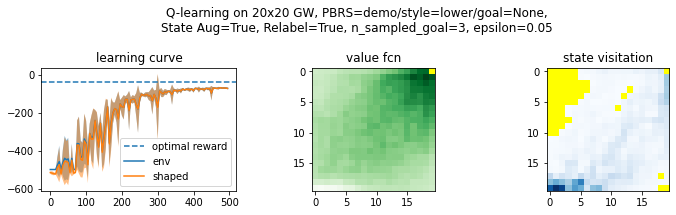

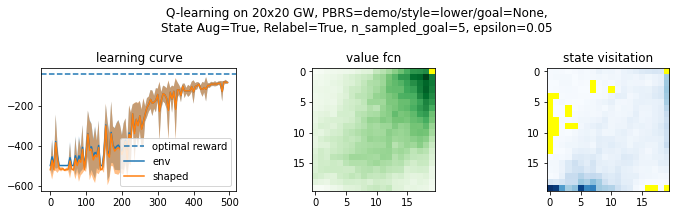

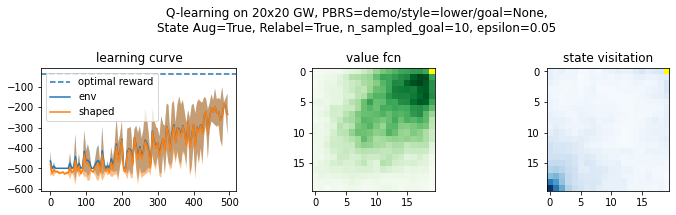

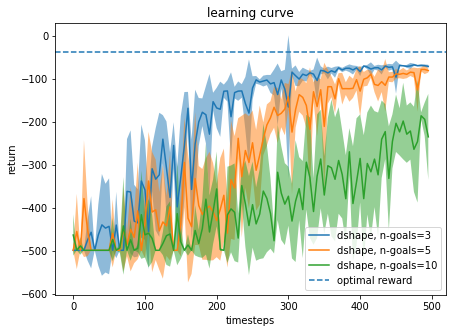

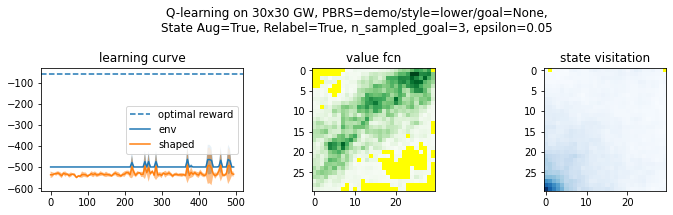

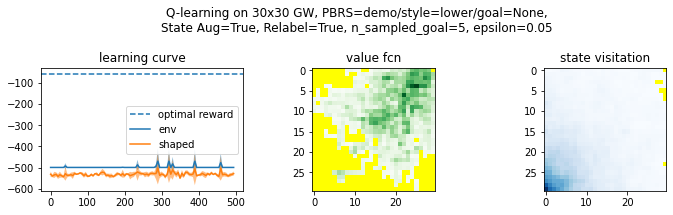

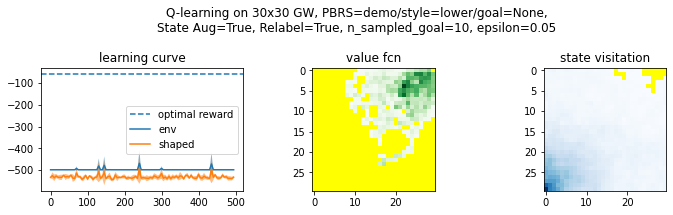

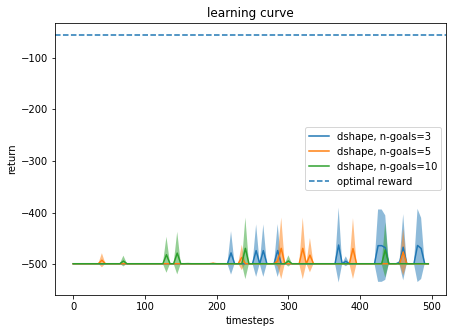

In [5]:
default_params_copy = copy.deepcopy(default_params)
del default_params_copy["n_sampled_goal"]
settings = {
    "dshape, n-goals=3": {
        "n_sampled_goal": 3,
        "reward_type": "pbrs_demo",
        "demo_style": "lower",
        "state_aug": True, 
        "relabel": True},
    "dshape, n-goals=5": {
        "n_sampled_goal": 5,
        "reward_type": "pbrs_demo",
        "demo_style": "lower",
        "state_aug": True, 
        "relabel": True},
    "dshape, n-goals=10": {
        "n_sampled_goal": 10,
        "reward_type": "pbrs_demo",
        "demo_style": "lower",
        "state_aug": True, 
        "relabel": True},
}

for gridworld_size in [20, 30]:
    learning_info = {}
    for exp_name, exp_params in settings.items():
        trial_rewards, opt_rew = run_agent(gridworld_size=gridworld_size, 
                                        **default_params_copy, 
                                        **exp_params)
        learning_info[exp_name] = trial_rewards

    plot_expts(learning_info, 
               eval_freq=default_params["eval_freq"], 
               opt_rew=opt_rew)

#### Experiment D: D-Shape with Suboptimal Demonstrations

 ##### Suboptimality type 1: changing the goal location

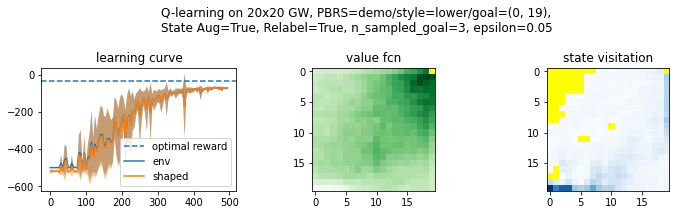

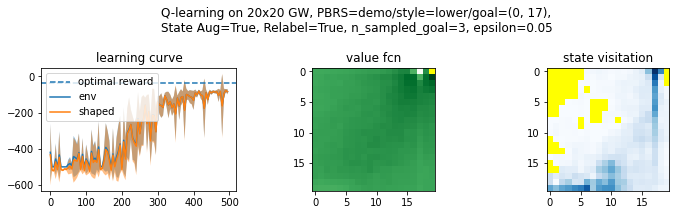

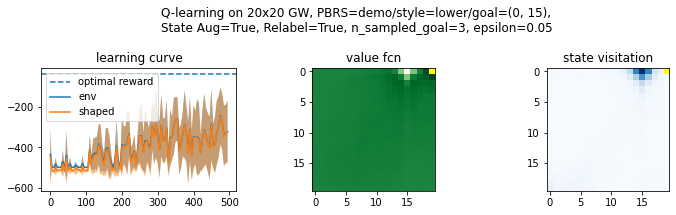

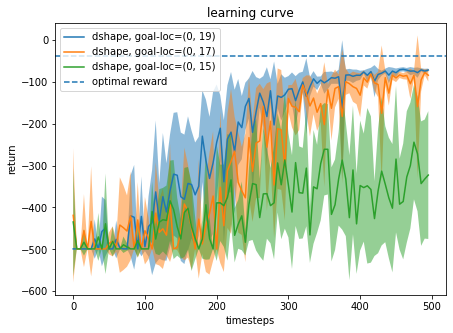

In [6]:
gridworld_size = 20
settings = {
    "dshape, goal-loc=(0, 19)": {
        "demo_goal": (0, gridworld_size - 1), # optimal demo
        "reward_type": "pbrs_demo",
        "demo_style": "lower",
        "state_aug": True, 
        "relabel": True},
    "dshape, goal-loc=(0, 17)": {
        "demo_goal": (0, gridworld_size - 3), # subopt dmeo
        "reward_type": "pbrs_demo",
        "demo_style": "lower",
        "state_aug": True, 
        "relabel": True},
    "dshape, goal-loc=(0, 15)": {
        "demo_goal": (0, gridworld_size - 5), # worst demo
        "reward_type": "pbrs_demo",
        "demo_style": "lower",
        "state_aug": True, 
        "relabel": True},
}

learning_info = {}
for exp_name, exp_params in settings.items():
    trial_rewards, opt_rew = run_agent(gridworld_size=gridworld_size, 
                                    **default_params, 
                                    **exp_params)
    learning_info[exp_name] = trial_rewards

plot_expts(learning_info, 
           eval_freq=default_params["eval_freq"], 
           opt_rew=opt_rew)

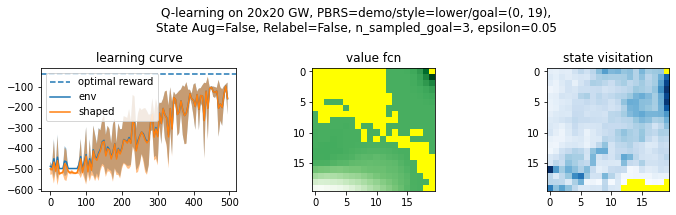

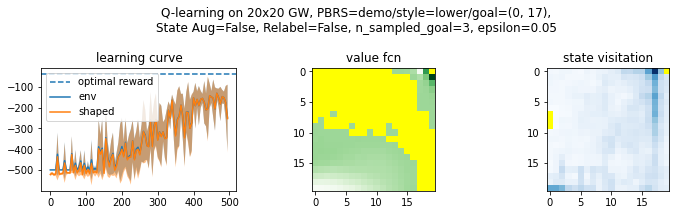

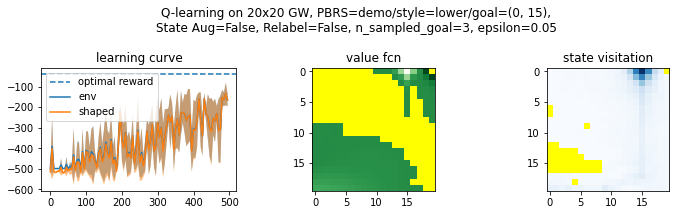

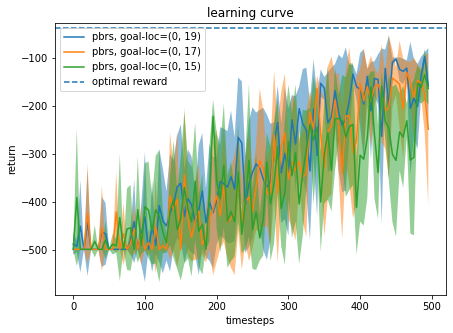

In [7]:
# same experiment as above but with potential-based reward shaping
gridworld_size = 20
settings = {
    "pbrs, goal-loc=(0, 19)": {
        "demo_goal": (0, gridworld_size - 1), # optimal demo
        "reward_type": "pbrs_demo",
        "demo_style": "lower",
        "state_aug": False, 
        "relabel": False},
    "pbrs, goal-loc=(0, 17)": {
        "demo_goal": (0, gridworld_size - 3), # subopt dmeo
        "reward_type": "pbrs_demo",
        "demo_style": "lower",
        "state_aug": False, 
        "relabel": False},
    "pbrs, goal-loc=(0, 15)": {
        "demo_goal": (0, gridworld_size - 5), # worst demo
        "reward_type": "pbrs_demo",
        "demo_style": "lower",
        "state_aug": False, 
        "relabel": False},
}

learning_info = {}
for exp_name, exp_params in settings.items():
    trial_rewards, opt_rew = run_agent(gridworld_size=gridworld_size, 
                                    **default_params, 
                                    **exp_params)
    learning_info[exp_name] = trial_rewards

plot_expts(learning_info, 
           eval_freq=default_params["eval_freq"], 
           opt_rew=opt_rew)

##### Suboptimality Style 2: Extending the demonstration

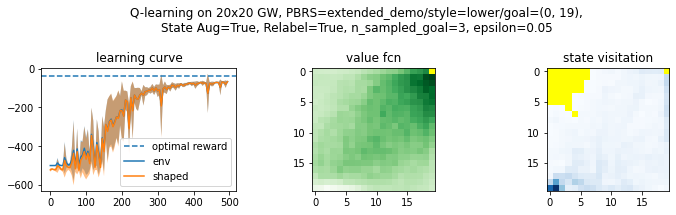

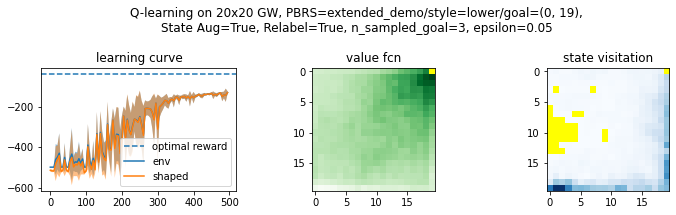

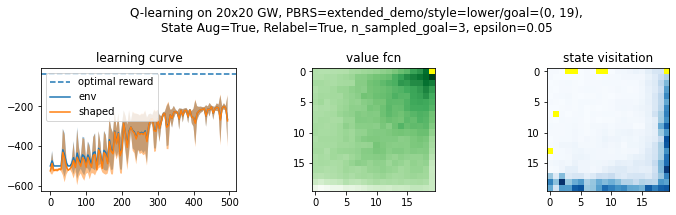

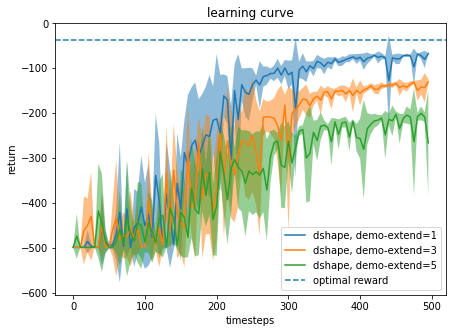

In [8]:
gridworld_size = 20
settings = {
    "dshape, demo-extend=1": {
        "demo_goal": (0, gridworld_size - 1), # optimal demo
        "pbrs_type": "extended_demo",
        "demo_style": "lower",
        "demo_extend_num": 1,
        "state_aug": True, 
        "relabel": True},
    "dshape, demo-extend=3": {
        "demo_goal": (0, gridworld_size - 1), # subopt dmeo
        "pbrs_type": "extended_demo",
        "demo_style": "lower",
        "demo_extend_num": 3,
        "state_aug": True, 
        "relabel": True},
    "dshape, demo-extend=5": {
        "demo_goal": (0, gridworld_size - 1), # worst demo
        "pbrs_type": "extended_demo",
        "demo_style": "lower",
        "demo_extend_num": 5,
        "state_aug": True, 
        "relabel": True}
}

learning_info = {}
for exp_name, exp_params in settings.items():
    trial_rewards, opt_rew = run_agent(gridworld_size=gridworld_size, 
                                    **default_params, 
                                    **exp_params)
    learning_info[exp_name] = trial_rewards

plot_expts(learning_info, 
           eval_freq=default_params["eval_freq"], 
           opt_rew=opt_rew)

#### Experiment D, ii: DShape+Suboptimal Demonstrations Trained for Longer

In [9]:
default_params_copy = copy.copy(default_params)
default_params_copy["n_episodes"] = 1000
default_params_copy["max_steps_per_episode"] = 1000

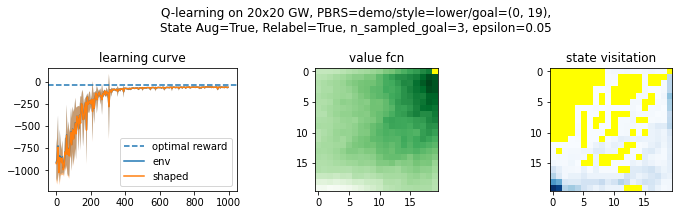

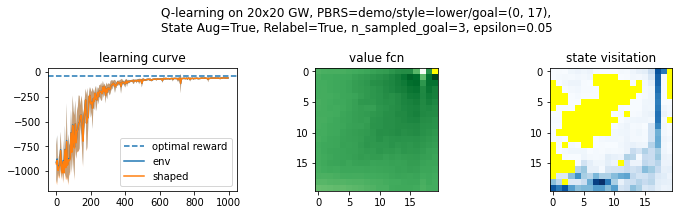

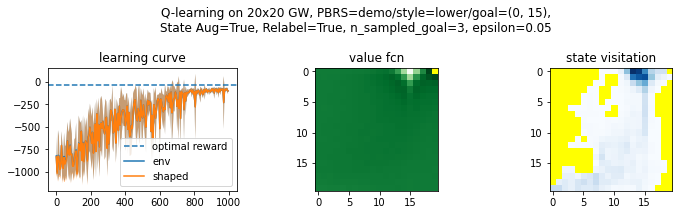

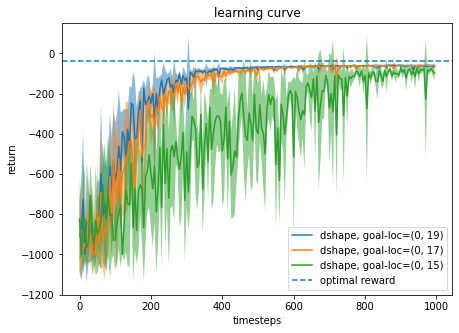

In [10]:
# suboptimality style 1: wrong goal
gridworld_size = 20

settings = {
    "dshape, goal-loc=(0, 19)": {
        "demo_goal": (0, gridworld_size - 1), # optimal demo
        "reward_type": "pbrs_demo",
        "demo_style": "lower",
        "state_aug": True, 
        "relabel": True},
    "dshape, goal-loc=(0, 17)": {
        "demo_goal": (0, gridworld_size - 3), # subopt dmeo
        "reward_type": "pbrs_demo",
        "demo_style": "lower",
        "state_aug": True, 
        "relabel": True},
    "dshape, goal-loc=(0, 15)": {
        "demo_goal": (0, gridworld_size - 5), # worst demo
        "reward_type": "pbrs_demo",
        "demo_style": "lower",
        "state_aug": True, 
        "relabel": True},
}

learning_info = {}
for exp_name, exp_params in settings.items():
    trial_rewards, opt_rew = run_agent(gridworld_size=gridworld_size, 
                                    **default_params_copy, 
                                    **exp_params)
    learning_info[exp_name] = trial_rewards

plot_expts(learning_info, 
           eval_freq=default_params["eval_freq"], 
           opt_rew=opt_rew)

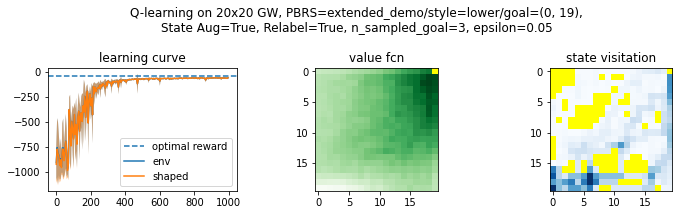

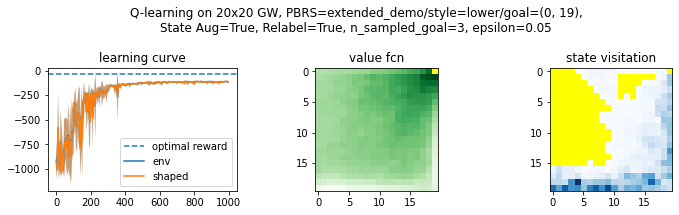

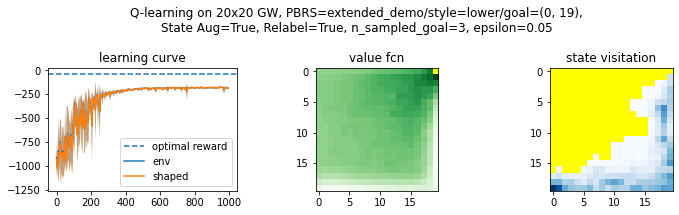

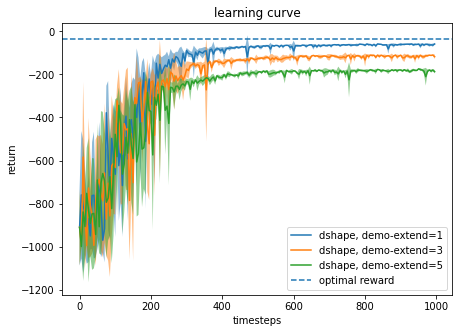

In [11]:
# extended demo
gridworld_size = 20
settings = {
    "dshape, demo-extend=1": {
        "demo_goal": (0, gridworld_size - 1), # optimal demo
        "pbrs_type": "extended_demo",
        "demo_style": "lower",
        "demo_extend_num": 1,
        "state_aug": True, 
        "relabel": True},
    "dshape, demo-extend=3": {
        "demo_goal": (0, gridworld_size - 1), # subopt dmeo
        "pbrs_type": "extended_demo",
        "demo_style": "lower",
        "demo_extend_num": 3,
        "state_aug": True, 
        "relabel": True},
    "dshape, demo-extend=5": {
        "demo_goal": (0, gridworld_size - 1), # worst demo
        "pbrs_type": "extended_demo",
        "demo_style": "lower",
        "demo_extend_num": 5,
        "state_aug": True, 
        "relabel": True}
}

learning_info = {}
for exp_name, exp_params in settings.items():
    trial_rewards, opt_rew = run_agent(gridworld_size=gridworld_size, 
                                    **default_params_copy, 
                                    **exp_params)
    learning_info[exp_name] = trial_rewards

plot_expts(learning_info, 
           eval_freq=default_params["eval_freq"], 
           opt_rew=opt_rew)

#### Experiment F: Modifying Coefficient Balancing Potential / Environment

In [12]:
default_params_copy = copy.copy(default_params)
default_params_copy["n_episodes"] = 1000
default_params_copy["max_steps_per_episode"] = 1000

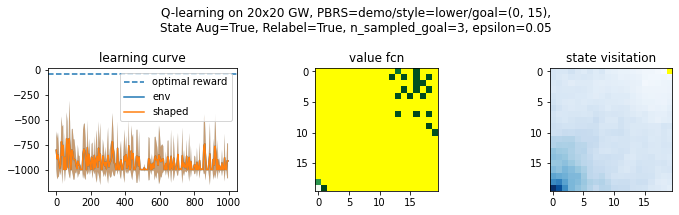

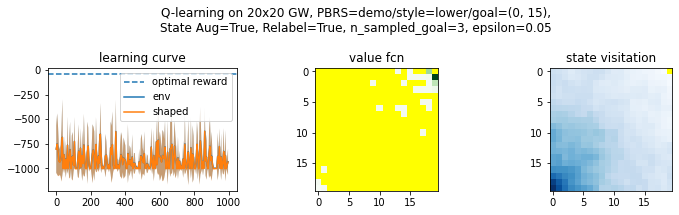

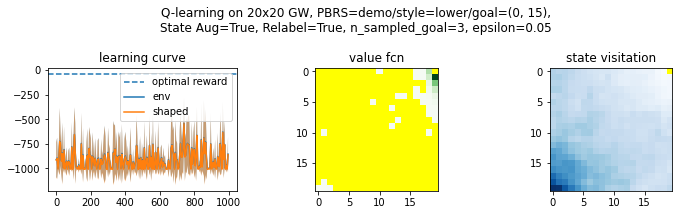

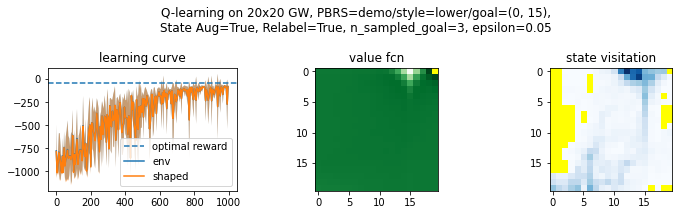

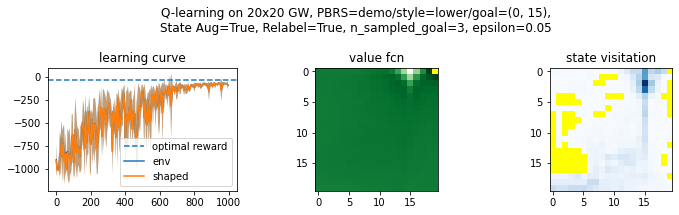

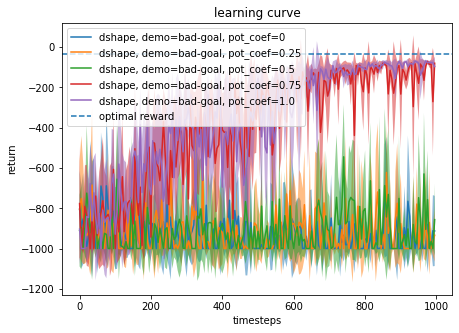

In [13]:
# suboptimality style 1: wrong goal
gridworld_size = 20

settings = {
    "dshape, demo=bad-goal, pot_coef=0": {
        "demo_goal": (0, gridworld_size - 5), # worst demo
        "reward_type": "pbrs_demo",
        "pot_coef": 0,
        "demo_style": "lower",
        "state_aug": True, 
        "relabel": True},
    "dshape, demo=bad-goal, pot_coef=0.25": {
        "demo_goal": (0, gridworld_size - 5), # worst demo
        "reward_type": "pbrs_demo",
        "pot_coef": 0.25,
        "demo_style": "lower",
        "state_aug": True, 
        "relabel": True},
    "dshape, demo=bad-goal, pot_coef=0.5": {
        "demo_goal": (0, gridworld_size - 5), # worst dmeo
        "reward_type": "pbrs_demo",
        "pot_coef": 0.5,
        "demo_style": "lower",
        "state_aug": True, 
        "relabel": True},
    "dshape, demo=bad-goal, pot_coef=0.75": {
        "demo_goal": (0, gridworld_size - 5), # worst demo
        "reward_type": "pbrs_demo",
        "pot_coef": 0.75,
        "demo_style": "lower",
        "state_aug": True, 
        "relabel": True},
    "dshape, demo=bad-goal, pot_coef=1.0": {
        "demo_goal": (0, gridworld_size - 5), # worst demo
        "reward_type": "pbrs_demo",
        "pot_coef": 1.0,
        "demo_style": "lower",
        "state_aug": True, 
        "relabel": True},
}

learning_info = {}
for exp_name, exp_params in settings.items():
    trial_rewards, opt_rew = run_agent(gridworld_size=gridworld_size, 
                                    **default_params_copy, 
                                    **exp_params)
    learning_info[exp_name] = trial_rewards

plot_expts(learning_info, 
           eval_freq=default_params["eval_freq"], 
           opt_rew=opt_rew)

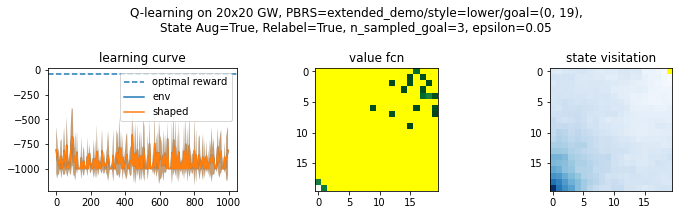

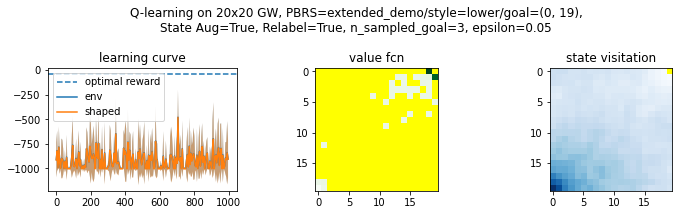

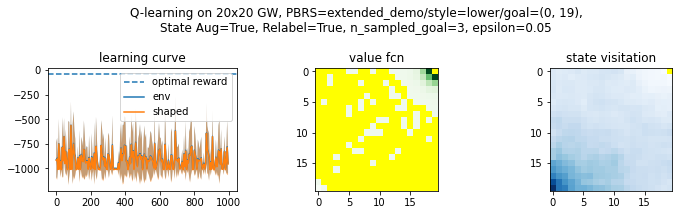

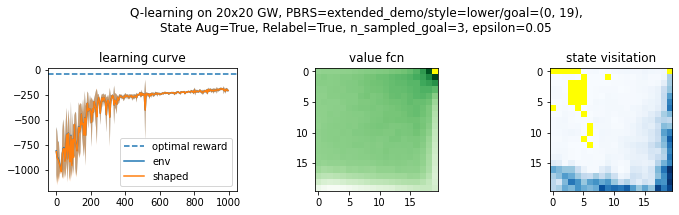

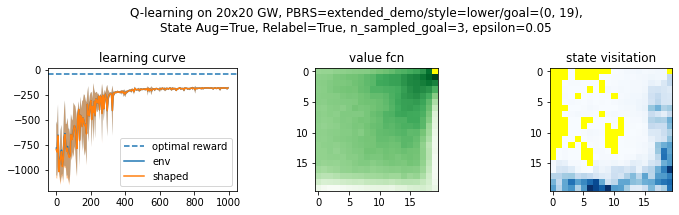

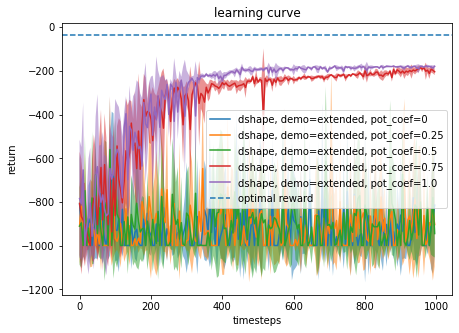

In [14]:
# suboptimality style 2: goal extension
gridworld_size = 20

settings = {
    "dshape, demo=extended, pot_coef=0": {
        "demo_goal": (0, gridworld_size - 1), # worst demo
        "pbrs_type": "extended_demo",
        "demo_extend_num": 5,
        "pot_coef": 0,
        "demo_style": "lower",
        "state_aug": True, 
        "relabel": True},
    "dshape, demo=extended, pot_coef=0.25": {
        "demo_goal": (0, gridworld_size - 1), # worst demo
        "pbrs_type": "extended_demo",
        "demo_extend_num": 5,
        "pot_coef": 0.25,
        "demo_style": "lower",
        "state_aug": True, 
        "relabel": True},
    "dshape, demo=extended, pot_coef=0.5": {
        "demo_goal": (0, gridworld_size - 1), # worst dmeo
        "pbrs_type": "extended_demo",
        "demo_extend_num": 5,
        "pot_coef": 0.5,
        "demo_style": "lower",
        "state_aug": True, 
        "relabel": True},
    "dshape, demo=extended, pot_coef=0.75": {
        "demo_goal": (0, gridworld_size - 1), # worst demo
        "pbrs_type": "extended_demo",
        "demo_extend_num": 5,
        "pot_coef": 0.75,
        "demo_style": "lower",
        "state_aug": True, 
        "relabel": True},
    "dshape, demo=extended, pot_coef=1.0": {
        "demo_goal": (0, gridworld_size - 1), # worst demo
        "pbrs_type": "extended_demo",
        "demo_extend_num": 5,
        "pot_coef": 1.0,
        "demo_style": "lower",
        "state_aug": True, 
        "relabel": True},
}

learning_info = {}
for exp_name, exp_params in settings.items():
    trial_rewards, opt_rew = run_agent(gridworld_size=gridworld_size, 
                                    **default_params_copy, 
                                    **exp_params)
    learning_info[exp_name] = trial_rewards

plot_expts(learning_info, 
           eval_freq=default_params["eval_freq"], 
           opt_rew=opt_rew)

#### Experiment G: D-Shape with larger buffer size

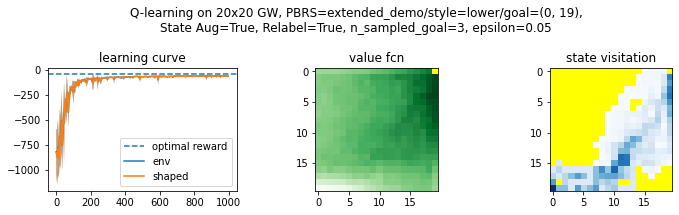

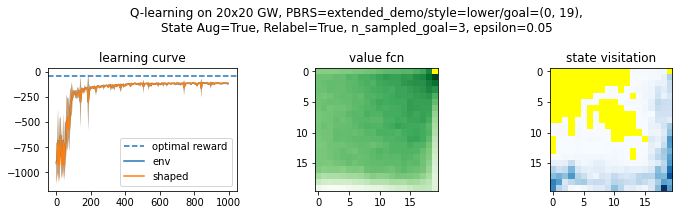

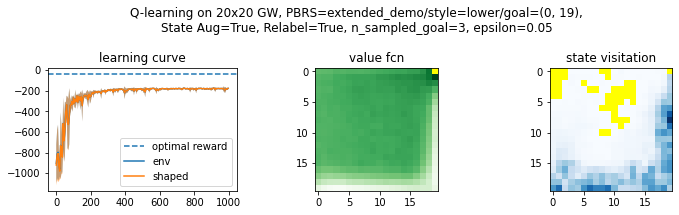

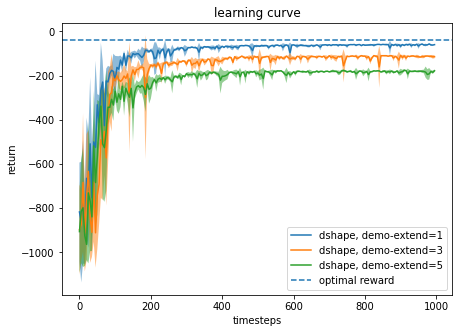

In [15]:
gridworld_size = 20
default_params_copy["buffer_size"] = 10000

settings = {
    "dshape, demo-extend=1": {
        "demo_goal": (0, gridworld_size - 1), # optimal demo
        "pbrs_type": "extended_demo",
        "demo_style": "lower",
        "demo_extend_num": 1,
        "state_aug": True, 
        "relabel": True},
    "dshape, demo-extend=3": {
        "demo_goal": (0, gridworld_size - 1), # subopt dmeo
        "pbrs_type": "extended_demo",
        "demo_style": "lower",
        "demo_extend_num": 3,
        "state_aug": True, 
        "relabel": True},
    "dshape, demo-extend=5": {
        "demo_goal": (0, gridworld_size - 1), # worst demo
        "pbrs_type": "extended_demo",
        "demo_style": "lower",
        "demo_extend_num": 5,
        "state_aug": True, 
        "relabel": True}
}

learning_info = {}
for exp_name, exp_params in settings.items():
    trial_rewards, opt_rew = run_agent(gridworld_size=gridworld_size, 
                                    **default_params_copy, 
                                    **exp_params)
    learning_info[exp_name] = trial_rewards

plot_expts(learning_info, 
           eval_freq=default_params["eval_freq"], 
           opt_rew=opt_rew)

#### Experiment H: D-Shape w/Suboptimal Demos on Small Gridworld

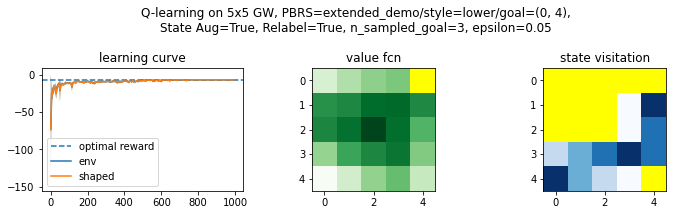

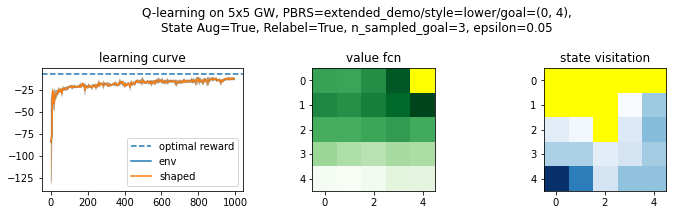

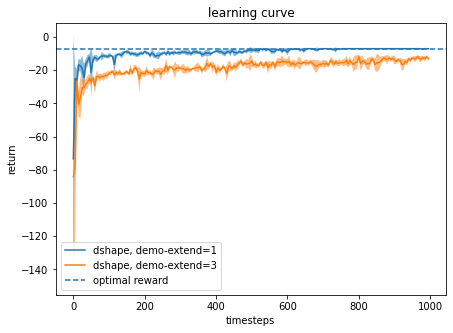

In [16]:
# same experiment as above, but with a MUCH smaller gridworld size!
gridworld_size = 5
settings = {
    "dshape, demo-extend=1": {
        "demo_goal": (0, gridworld_size - 1), # optimal demo
        "pbrs_type": "extended_demo",
        "demo_style": "lower",
        "demo_extend_num": 1,
        "state_aug": True, 
        "relabel": True},
    "dshape, demo-extend=3": {
        "demo_goal": (0, gridworld_size - 1), # subopt dmeo
        "pbrs_type": "extended_demo",
        "demo_style": "lower",
        "demo_extend_num": 3,
        "state_aug": True, 
        "relabel": True},
}

learning_info = {}
for exp_name, exp_params in settings.items():
    trial_rewards, opt_rew = run_agent(gridworld_size=gridworld_size, 
                                    **default_params_copy, 
                                    **exp_params)
    learning_info[exp_name] = trial_rewards

plot_expts(learning_info, 
           eval_freq=default_params["eval_freq"], 
           opt_rew=opt_rew)

#### Experiment E: D-Shape with Different Relabelling Strategies